In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

# Explore the dataset

In [2]:
campaign = pd.read_csv("./italian_vaccination.csv")
campaign.head(2)

,administration_date,supplier,region,age_range,males,females,healthcare_workers,non_healthcare_workers,care_home_patients,category_60_69,...,armed_forces,school_staff,vulnerable_subjects,others,first_dose,second_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,...,0,0,0,0,1,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,3,4,0,0,0,...,0,0,0,0,4,0,ITF,ITF1,13,Abruzzo


In [3]:
campaign.shape

(57618, 22)

In [4]:
campaign.columns

Index(['administration_date', 'supplier', 'region', 'age_range', 'males',
       'females', 'healthcare_workers', 'non_healthcare_workers',
       'care_home_patients', 'category_60_69', 'category_70_79', 'over_80',
       'armed_forces', 'school_staff', 'vulnerable_subjects', 'others',
       'first_dose', 'second_dose', 'NUTS1_code', 'NUTS2_code',
       'ISTAT_regional_code', 'region_name'],
      dtype='object')

In [5]:
campaign.dtypes

administration_date       object
supplier                  object
region                    object
age_range                 object
males                      int64
females                    int64
healthcare_workers         int64
non_healthcare_workers     int64
care_home_patients         int64
category_60_69             int64
category_70_79             int64
over_80                    int64
armed_forces               int64
school_staff               int64
vulnerable_subjects        int64
others                     int64
first_dose                 int64
second_dose                int64
NUTS1_code                object
NUTS2_code                object
ISTAT_regional_code        int64
region_name               object
dtype: object

In [6]:
campaign.isnull().sum()

administration_date       0
supplier                  0
region                    0
age_range                 0
males                     0
females                   0
healthcare_workers        0
non_healthcare_workers    0
care_home_patients        0
category_60_69            0
category_70_79            0
over_80                   0
armed_forces              0
school_staff              0
vulnerable_subjects       0
others                    0
first_dose                0
second_dose               0
NUTS1_code                0
NUTS2_code                0
ISTAT_regional_code       0
region_name               0
dtype: int64

In [7]:
campaign.tail(2)

,administration_date,supplier,region,age_range,males,females,healthcare_workers,non_healthcare_workers,care_home_patients,category_60_69,...,armed_forces,school_staff,vulnerable_subjects,others,first_dose,second_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name
57616,2021-05-25,Vaxzevria (AstraZeneca),VEN,70-79,285,250,5,11,0,0,...,1,10,0,0,1,534,ITH,ITH3,5,Veneto
57617,2021-05-25,Vaxzevria (AstraZeneca),VEN,80-89,1,0,0,0,0,0,...,0,0,0,0,0,1,ITH,ITH3,5,Veneto


In [3]:
campaign["Total_doses"] = campaign["first_dose"]+campaign["second_dose"]

In [9]:
campaign.head(3)

,administration_date,supplier,region,age_range,males,females,healthcare_workers,non_healthcare_workers,care_home_patients,category_60_69,...,school_staff,vulnerable_subjects,others,first_dose,second_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name,Total_doses
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,...,0,0,0,1,0,ITF,ITF1,13,Abruzzo,1
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,3,4,0,0,0,...,0,0,0,4,0,ITF,ITF1,13,Abruzzo,4
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,6,7,0,0,0,...,0,0,0,7,0,ITF,ITF1,13,Abruzzo,7


In [10]:
campaign.tail(3)

,administration_date,supplier,region,age_range,males,females,healthcare_workers,non_healthcare_workers,care_home_patients,category_60_69,...,school_staff,vulnerable_subjects,others,first_dose,second_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name,Total_doses
57615,2021-05-25,Vaxzevria (AstraZeneca),VEN,60-69,94,108,3,30,0,13,...,140,0,1,1,201,ITH,ITH3,5,Veneto,202
57616,2021-05-25,Vaxzevria (AstraZeneca),VEN,70-79,285,250,5,11,0,0,...,10,0,0,1,534,ITH,ITH3,5,Veneto,535
57617,2021-05-25,Vaxzevria (AstraZeneca),VEN,80-89,1,0,0,0,0,0,...,0,0,0,0,1,ITH,ITH3,5,Veneto,1


In [11]:
supp= campaign.groupby("supplier")["Total_doses"].sum()
supp

supplier
Janssen                      450680
Moderna                     2718369
Pfizer/BioNTech            21817404
Vaxzevria (AstraZeneca)     6562618
Name: Total_doses, dtype: int64

In [12]:
first= campaign.groupby("supplier")["first_dose"].sum()
first

supplier
Janssen                      450680
Moderna                     1863381
Pfizer/BioNTech            13243436
Vaxzevria (AstraZeneca)     5931143
Name: first_dose, dtype: int64

In [13]:
second= campaign.groupby("supplier")["second_dose"].sum()
second

supplier
Janssen                          0
Moderna                     854988
Pfizer/BioNTech            8573968
Vaxzevria (AstraZeneca)     631475
Name: second_dose, dtype: int64

In [14]:
campaign.columns

Index(['administration_date', 'supplier', 'region', 'age_range', 'males',
       'females', 'healthcare_workers', 'non_healthcare_workers',
       'care_home_patients', 'category_60_69', 'category_70_79', 'over_80',
       'armed_forces', 'school_staff', 'vulnerable_subjects', 'others',
       'first_dose', 'second_dose', 'NUTS1_code', 'NUTS2_code',
       'ISTAT_regional_code', 'region_name', 'Total_doses'],
      dtype='object')

In [37]:
campaign.dtypes

administration_date       object
supplier                  object
region                    object
age_range                 object
males                      int64
females                    int64
healthcare_workers         int64
non_healthcare_workers     int64
care_home_patients         int64
category_60_69             int64
category_70_79             int64
over_80                    int64
armed_forces               int64
school_staff               int64
vulnerable_subjects        int64
others                     int64
first_dose                 int64
second_dose                int64
NUTS1_code                object
NUTS2_code                object
ISTAT_regional_code        int64
region_name               object
Total_doses                int64
dtype: object

In [15]:
females= campaign.groupby("supplier")["females"].sum()
females

supplier
Janssen                      219622
Moderna                     1529978
Pfizer/BioNTech            12214427
Vaxzevria (AstraZeneca)     3590432
Name: females, dtype: int64

In [16]:
males= campaign.groupby("supplier")["males"].sum()
males

supplier
Janssen                     231058
Moderna                    1188391
Pfizer/BioNTech            9602977
Vaxzevria (AstraZeneca)    2972186
Name: males, dtype: int64

In [11]:
pfizer = campaign.query("`supplier` == 'Pfizer/BioNTech'")
pfizer

,administration_date,supplier,region,age_range,males,females,healthcare_workers,non_healthcare_workers,care_home_patients,category_60_69,...,school_staff,vulnerable_subjects,others,first_dose,second_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name,Total_doses
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,...,0,0,0,1,0,ITF,ITF1,13,Abruzzo,1
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,3,4,0,0,0,...,0,0,0,4,0,ITF,ITF1,13,Abruzzo,4
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,6,7,0,0,0,...,0,0,0,7,0,ITF,ITF1,13,Abruzzo,7
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,4,5,9,0,0,0,...,0,0,0,9,0,ITF,ITF1,13,Abruzzo,9
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,10,4,13,1,0,0,...,0,0,0,14,0,ITF,ITF1,13,Abruzzo,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57480,2021-05-25,Pfizer/BioNTech,VEN,50-59,1206,1205,15,14,2,0,...,20,346,2004,1883,528,ITH,ITH3,5,Veneto,2411
57481,2021-05-25,Pfizer/BioNTech,VEN,60-69,1392,1406,7,5,0,2308,...,20,283,175,106,2692,ITH,ITH3,5,Veneto,2798
57482,2021-05-25,Pfizer/BioNTech,VEN,70-79,535,644,0,2,1,0,...,1,348,1,66,1113,ITH,ITH3,5,Veneto,1179
57483,2021-05-25,Pfizer/BioNTech,VEN,80-89,37,52,1,0,1,0,...,0,30,0,18,71,ITH,ITH3,5,Veneto,89


In [12]:
astrazeneca = campaign.query("`supplier` == 'Vaxzevria (AstraZeneca)'")
astrazeneca

,administration_date,supplier,region,age_range,males,females,healthcare_workers,non_healthcare_workers,care_home_patients,category_60_69,...,school_staff,vulnerable_subjects,others,first_dose,second_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name,Total_doses
2884,2021-01-15,Vaxzevria (AstraZeneca),PIE,60-69,0,1,0,0,0,1,...,0,0,0,1,0,ITC,ITC1,1,Piemonte,1
4386,2021-01-22,Vaxzevria (AstraZeneca),PAT,30-39,1,0,0,0,0,0,...,1,0,0,1,0,ITH,ITH2,4,Provincia Autonoma Trento,1
4387,2021-01-22,Vaxzevria (AstraZeneca),PAT,50-59,0,2,0,0,0,0,...,2,0,0,2,0,ITH,ITH2,4,Provincia Autonoma Trento,2
6006,2021-01-30,Vaxzevria (AstraZeneca),PAT,20-29,0,1,0,0,0,0,...,1,0,0,1,0,ITH,ITH2,4,Provincia Autonoma Trento,1
6408,2021-02-01,Vaxzevria (AstraZeneca),LAZ,90+,1,0,1,0,0,0,...,0,0,0,1,0,ITI,ITI4,12,Lazio,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57613,2021-05-25,Vaxzevria (AstraZeneca),VEN,40-49,171,105,6,18,0,0,...,131,0,5,2,274,ITH,ITH3,5,Veneto,276
57614,2021-05-25,Vaxzevria (AstraZeneca),VEN,50-59,257,187,4,61,0,0,...,196,1,15,5,439,ITH,ITH3,5,Veneto,444
57615,2021-05-25,Vaxzevria (AstraZeneca),VEN,60-69,94,108,3,30,0,13,...,140,0,1,1,201,ITH,ITH3,5,Veneto,202
57616,2021-05-25,Vaxzevria (AstraZeneca),VEN,70-79,285,250,5,11,0,0,...,10,0,0,1,534,ITH,ITH3,5,Veneto,535


In [13]:
moderna = campaign.query("`supplier` == 'Moderna'")
moderna

,administration_date,supplier,region,age_range,males,females,healthcare_workers,non_healthcare_workers,care_home_patients,category_60_69,...,school_staff,vulnerable_subjects,others,first_dose,second_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name,Total_doses
1407,2021-01-08,Moderna,EMR,80-89,0,1,0,0,0,0,...,0,0,0,1,0,ITH,ITH5,8,Emilia-Romagna,1
1408,2021-01-08,Moderna,MAR,50-59,0,1,1,0,0,0,...,0,0,0,1,0,ITI,ITI3,11,Marche,1
2294,2021-01-13,Moderna,PAB,40-49,0,1,1,0,0,0,...,0,0,0,1,0,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen,1
2476,2021-01-14,Moderna,EMR,50-59,0,1,0,0,0,0,...,0,1,0,1,0,ITH,ITH5,8,Emilia-Romagna,1
2477,2021-01-14,Moderna,MAR,20-29,1,0,1,0,0,0,...,0,0,0,1,0,ITI,ITI3,11,Marche,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57294,2021-05-25,Moderna,VEN,50-59,459,456,11,6,0,0,...,5,69,824,838,77,ITH,ITH3,5,Veneto,915
57295,2021-05-25,Moderna,VEN,60-69,134,153,3,0,0,177,...,4,86,17,46,241,ITH,ITH3,5,Veneto,287
57296,2021-05-25,Moderna,VEN,70-79,99,107,0,0,0,0,...,0,90,0,22,184,ITH,ITH3,5,Veneto,206
57297,2021-05-25,Moderna,VEN,80-89,17,33,0,0,0,0,...,0,23,0,11,39,ITH,ITH3,5,Veneto,50


In [14]:
janssen = campaign.query("`supplier` == 'Janssen'")
janssen

,administration_date,supplier,region,age_range,males,females,healthcare_workers,non_healthcare_workers,care_home_patients,category_60_69,...,school_staff,vulnerable_subjects,others,first_dose,second_dose,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name,Total_doses
29056,2021-04-03,Janssen,PIE,60-69,1,0,0,0,0,1,...,0,0,0,1,0,ITC,ITC1,1,Piemonte,1
30334,2021-04-06,Janssen,LIG,60-69,1,3,0,0,0,3,...,0,0,1,4,0,ITC,ITC3,7,Liguria,4
30335,2021-04-06,Janssen,LIG,70-79,1,0,0,0,0,0,...,0,0,0,1,0,ITC,ITC3,7,Liguria,1
34247,2021-04-14,Janssen,VEN,70-79,0,1,0,0,0,0,...,0,0,0,1,0,ITH,ITH3,5,Veneto,1
38056,2021-04-22,Janssen,PUG,50-59,0,1,0,0,0,0,...,0,1,0,1,0,ITF,ITF4,16,Puglia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57124,2021-05-25,Janssen,VEN,50-59,17,3,0,0,0,0,...,0,0,20,20,0,ITH,ITH3,5,Veneto,20
57125,2021-05-25,Janssen,VEN,60-69,115,142,0,0,0,232,...,1,5,19,257,0,ITH,ITH3,5,Veneto,257
57126,2021-05-25,Janssen,VEN,70-79,36,46,0,0,0,0,...,0,0,0,82,0,ITH,ITH3,5,Veneto,82
57127,2021-05-25,Janssen,VEN,80-89,1,3,0,0,0,0,...,0,2,0,4,0,ITH,ITH3,5,Veneto,4


# Visualization of Vaccines Types

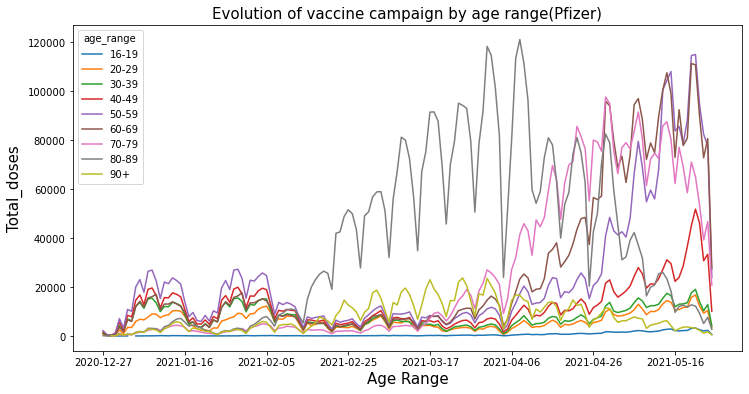

In [15]:
pfizer.groupby(["administration_date", "age_range"])["Total_doses"].sum().unstack().plot(figsize=(12,6))
plt.xlabel("Age Range", size=15)
plt.ylabel("Total_doses", size=15)
plt.title("Evolution of vaccine campaign by age range(Pfizer)", size=15)
plt.savefig("pfizer.png", format="png")

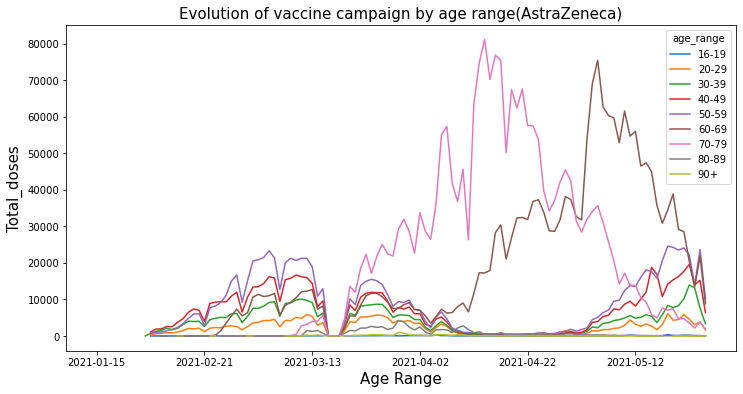

In [16]:
astrazeneca.groupby(["administration_date", "age_range"])["Total_doses"].sum().unstack().plot(figsize=(12,6))
plt.xlabel("Age Range", size=15)
plt.ylabel("Total_doses", size=15)
plt.title("Evolution of vaccine campaign by age range(AstraZeneca)", size=15)
plt.savefig("astrazeneca.png", format="png")

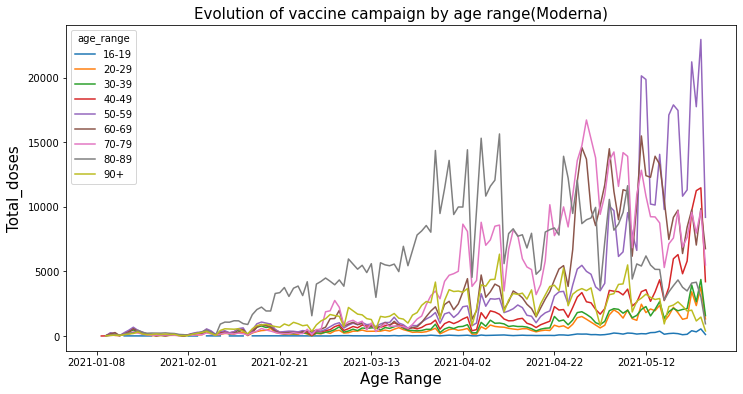

In [17]:
moderna.groupby(["administration_date", "age_range"])["Total_doses"].sum().unstack().plot(figsize=(12,6))
plt.xlabel("Age Range", size=15)
plt.ylabel("Total_doses", size=15)
plt.title("Evolution of vaccine campaign by age range(Moderna)", size=15)
plt.savefig("moderna.png", format="png")

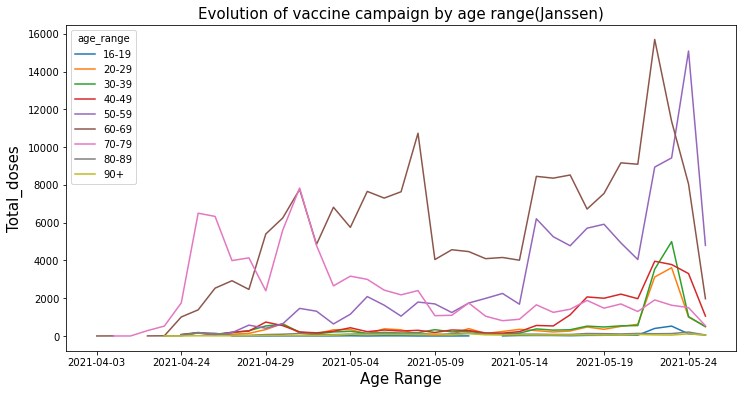

In [18]:
janssen.groupby(["administration_date", "age_range"])["Total_doses"].sum().unstack().plot(figsize=(12,6))
plt.xlabel("Age Range", size=15)
plt.ylabel("Total_doses", size=15)
plt.title("Evolution of vaccine campaign by age range(Janssen)", size=15)
plt.savefig("janssen.png", format="png")

In [30]:
campaign.columns

Index(['administration_date', 'supplier', 'region', 'age_range', 'males',
       'females', 'healthcare_workers', 'non_healthcare_workers',
       'care_home_patients', 'category_60_69', 'category_70_79', 'over_80',
       'armed_forces', 'school_staff', 'vulnerable_subjects', 'others',
       'first_dose', 'second_dose', 'NUTS1_code', 'NUTS2_code',
       'ISTAT_regional_code', 'region_name', 'Total_doses'],
      dtype='object')

Text(0.5, 1.0, 'Comparison of doses')

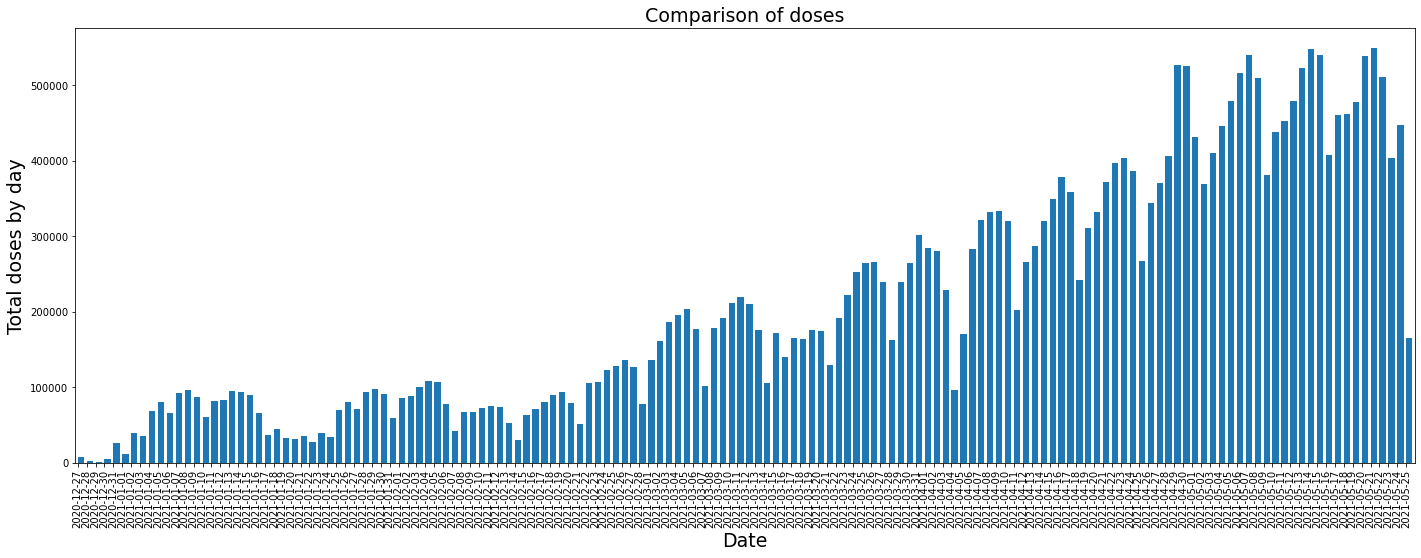

In [13]:
doses = campaign.groupby(['administration_date'])['Total_doses'].sum()
doses.plot.bar(figsize=(24,8), align='edge', width=0.7)
plt.xlabel("Date", size =19)
plt.ylabel("Total doses by day", size =19)
plt.title("Comparison of doses", size =19)

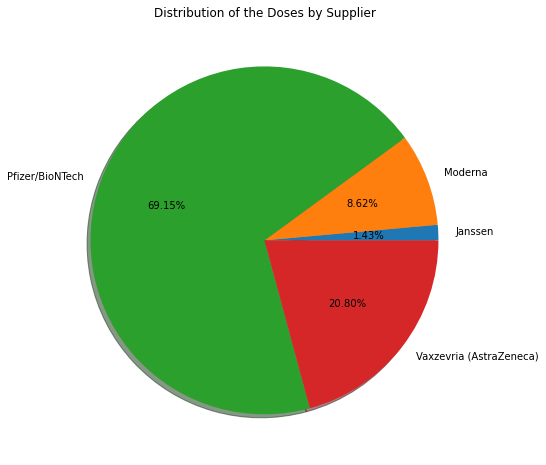

In [10]:
plt.show()
plt.figure(figsize = (12,8));
age = graph.groupby(["supplier"])["Total_doses"].sum();
plt.pie(age,labels = age.index,autopct='%1.2f%%',shadow=True);
plt.title('Distribution of the Doses by Supplier')
plt.savefig("Doses.png", format="png")

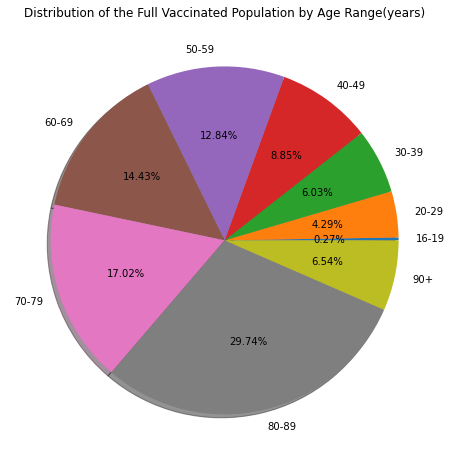

In [11]:
plt.show()
plt.figure(figsize = (12,8));
age = graph.groupby(["age_range"])["second_dose"].sum();
plt.pie(age,labels = age.index,autopct='%1.2f%%',shadow=True);
plt.title('Distribution of the Full Vaccinated Population by Age Range(years)')
plt.savefig("age_range.png", format="png")

# Visualization of First & Second dose 

In [14]:
graph=campaign[['administration_date','region_name','age_range','supplier','first_dose','second_dose','Total_doses']]
graph.tail(4)

,administration_date,region_name,age_range,supplier,first_dose,second_dose,Total_doses
57614,2021-05-25,Veneto,50-59,Vaxzevria (AstraZeneca),5,439,444
57615,2021-05-25,Veneto,60-69,Vaxzevria (AstraZeneca),1,201,202
57616,2021-05-25,Veneto,70-79,Vaxzevria (AstraZeneca),1,534,535
57617,2021-05-25,Veneto,80-89,Vaxzevria (AstraZeneca),0,1,1


In [15]:
graph.dtypes

administration_date    object
region_name            object
age_range              object
supplier               object
first_dose              int64
second_dose             int64
Total_doses             int64
dtype: object

In [3]:
graph.to_csv("./graph.csv", sep=';', index = False, encoding = 'utf-8')

NameError: name 'graph' is not defined

In [4]:
graph = pd.read_csv("./graph.csv", sep=';')
graph.head(2)

,administration_date,region_name,age_range,supplier,first_dose,second_dose,Total_doses
0,2020-12-27,Abruzzo,20-29,Pfizer/BioNTech,1,0,1
1,2020-12-27,Abruzzo,30-39,Pfizer/BioNTech,4,0,4


Text(0.5, 1.0, 'Evolution of Vaccine Campaign by Age Range(Total Doses)')

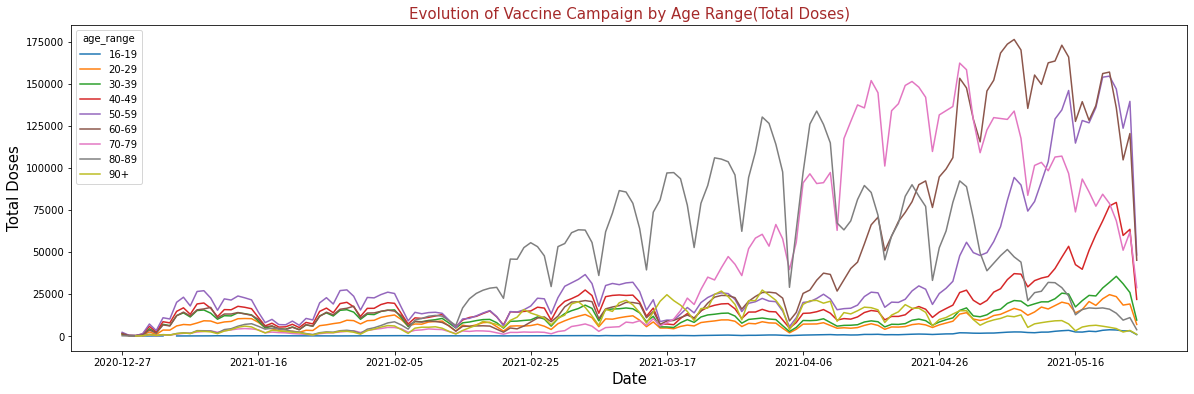

In [5]:
graph.groupby(["administration_date","age_range"])["Total_doses"].sum().unstack().plot(figsize=(20,6))
plt.xlabel("Date", size=15)
plt.ylabel("Total Doses", size=15)
plt.title("Evolution of Vaccine Campaign by Age Range(Total Doses)", loc='center', color='brown', size=15)

In [ ]:
plt.savefig("first_dose.png", format="png")

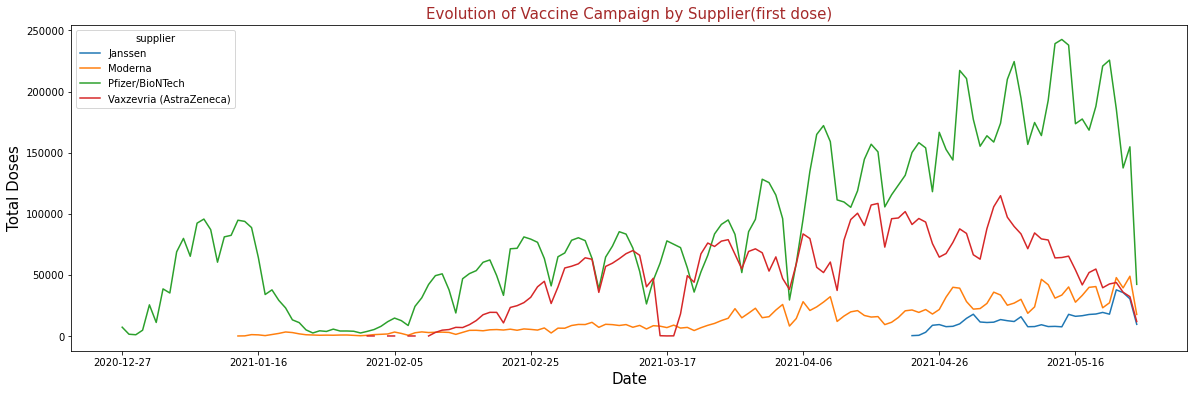

In [7]:
graph.groupby(["administration_date","supplier"])["first_dose"].sum().unstack().plot(figsize=(20,6))
plt.xlabel("Date", size=15)
plt.ylabel("Total Doses", size=15)
plt.title("Evolution of Vaccine Campaign by Supplier(first dose)", loc='center', color='brown', size=15)
plt.savefig("first_dose.png", format="png")

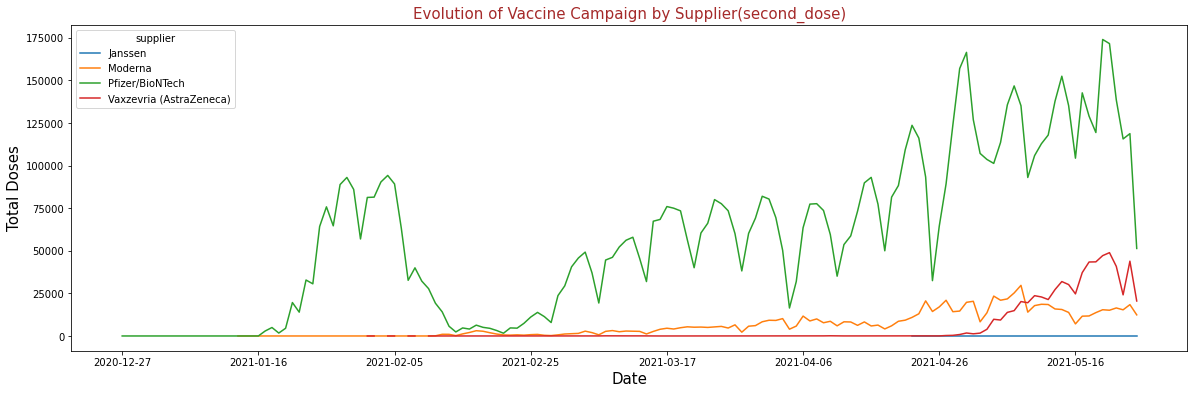

In [8]:
graph.groupby(["administration_date","supplier"])["second_dose"].sum().unstack().plot(figsize=(20,6))
plt.xlabel("Date", size=15)
plt.ylabel("Total Doses", size=15)
plt.title("Evolution of Vaccine Campaign by Supplier(second_dose)", loc='center', color='brown', size=15)
plt.savefig("second_dose.png", format="png")

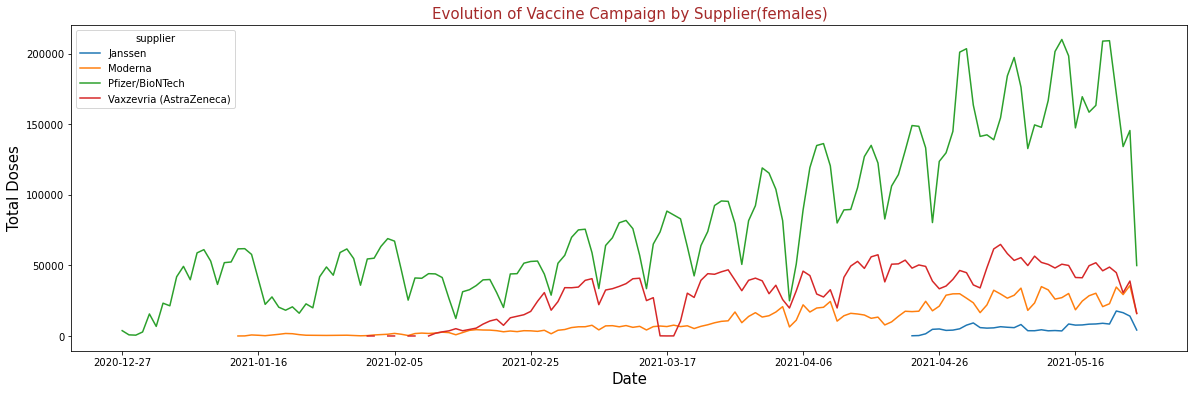

In [9]:
campaign.groupby(["administration_date","supplier"])["females"].sum().unstack().plot(figsize=(20,6))
plt.xlabel("Date", size=15)
plt.ylabel("Total Doses", size=15)
plt.title("Evolution of Vaccine Campaign by Supplier(females)", loc='center', color='brown', size=15)
plt.savefig("females.png", format="png")

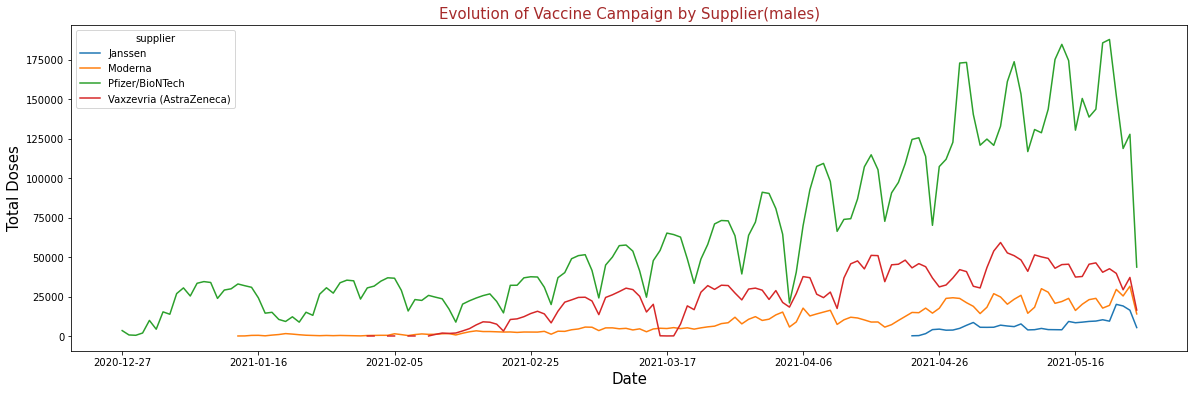

In [10]:
campaign.groupby(["administration_date","supplier"])["males"].sum().unstack().plot(figsize=(20,6))
plt.xlabel("Date", size=15)
plt.ylabel("Total Doses", size=15)
plt.title("Evolution of Vaccine Campaign by Supplier(males)", loc='center', color='brown', size=15)
plt.savefig("males.png", format="png")

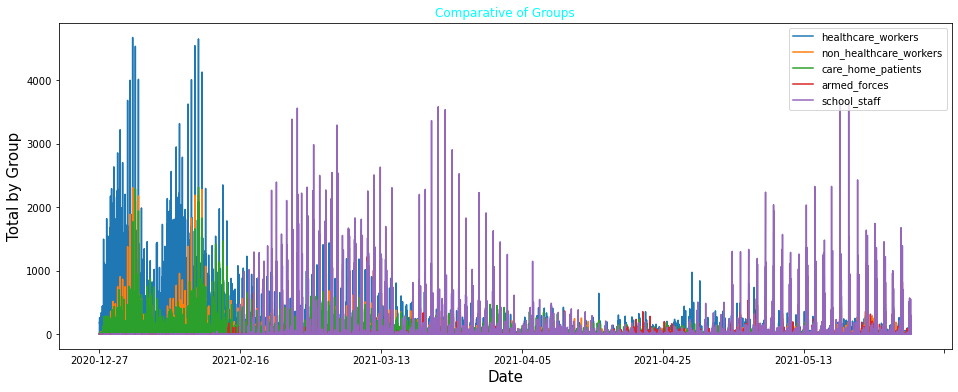

<Figure size 432x288 with 0 Axes>

In [21]:
campaign.plot(x="administration_date", y=["healthcare_workers", "non_healthcare_workers", "care_home_patients",
                                "armed_forces","school_staff"],
                  figsize=(16, 6))
plt.xlabel("Date", size=15)
plt.ylabel("Total by Group", size=15)
plt.title("Comparative of Groups", loc='center', fontsize=12, fontweight=4, color='aqua')
plt.show()
plt.savefig("groups.png", format="png")